# Neural Network  Assignment

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import adam_v2
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier

## 1. Forest Fires Dataset 

In [2]:
f = pd.read_csv('forestfires.csv')
f

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
f.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
f.shape

(517, 31)

In [6]:
f1 = f.iloc[:,0:11]
forest = pd.concat([f1,f['size_category']],axis=1)
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


<AxesSubplot:xlabel='temp', ylabel='wind'>

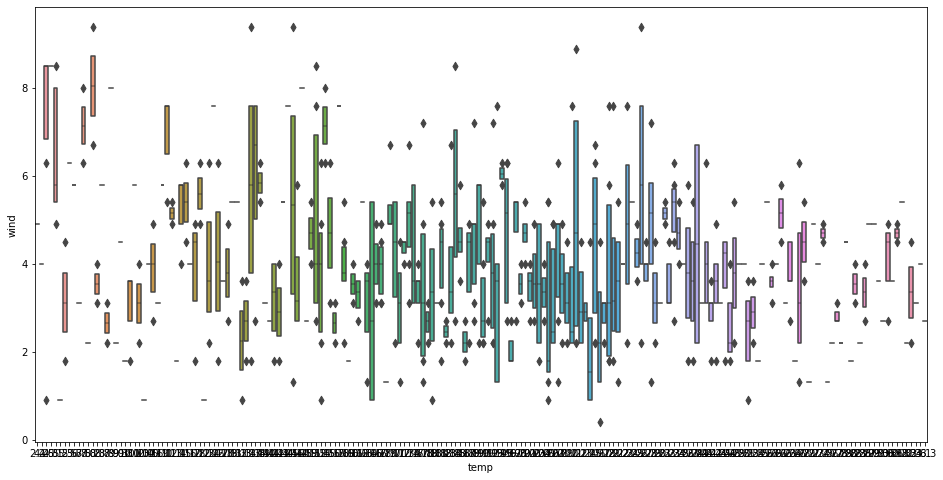

In [100]:
plt.figure(figsize = (16, 8));
sns.boxenplot(x = 'temp', y = 'wind', data = f1)

C:\Users\ROHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

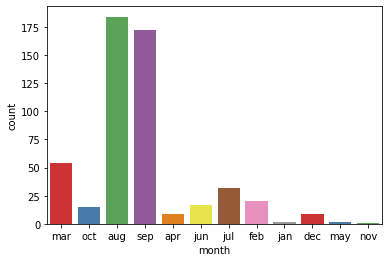

In [105]:
sns.countplot(f1['month'], palette="Set1")

<AxesSubplot:xlabel='DMC', ylabel='DC'>

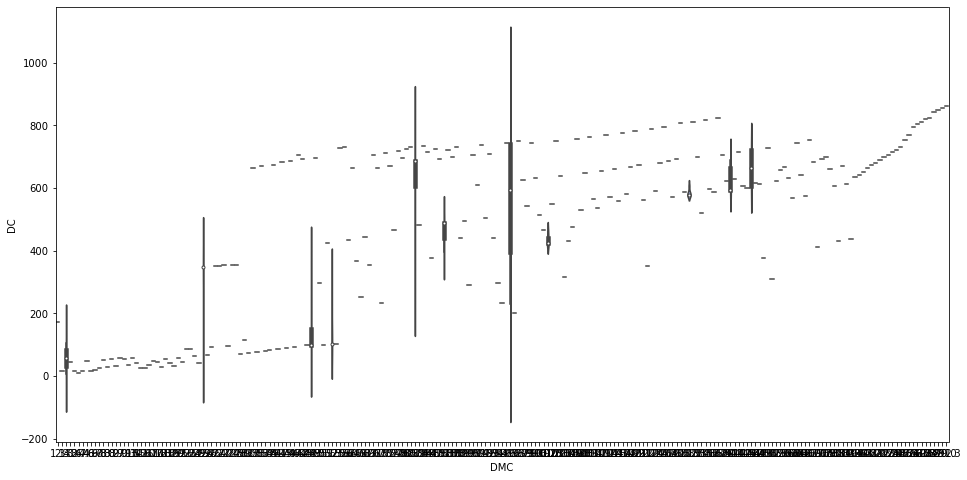

In [108]:
plt.figure(figsize = (16, 8));
sns.violinplot(x = 'DMC', y = 'DC', data = f1)

In [7]:
#Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
forest['month']= label_encoder.fit_transform(forest['month']) 
forest['day']= label_encoder.fit_transform(forest['day'])
forest['size_category']= label_encoder.fit_transform(forest['size_category'])

In [8]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [9]:
x=forest.iloc[:,0:11]
y=forest.iloc[:,-1]
x.head(7)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

### Visualization

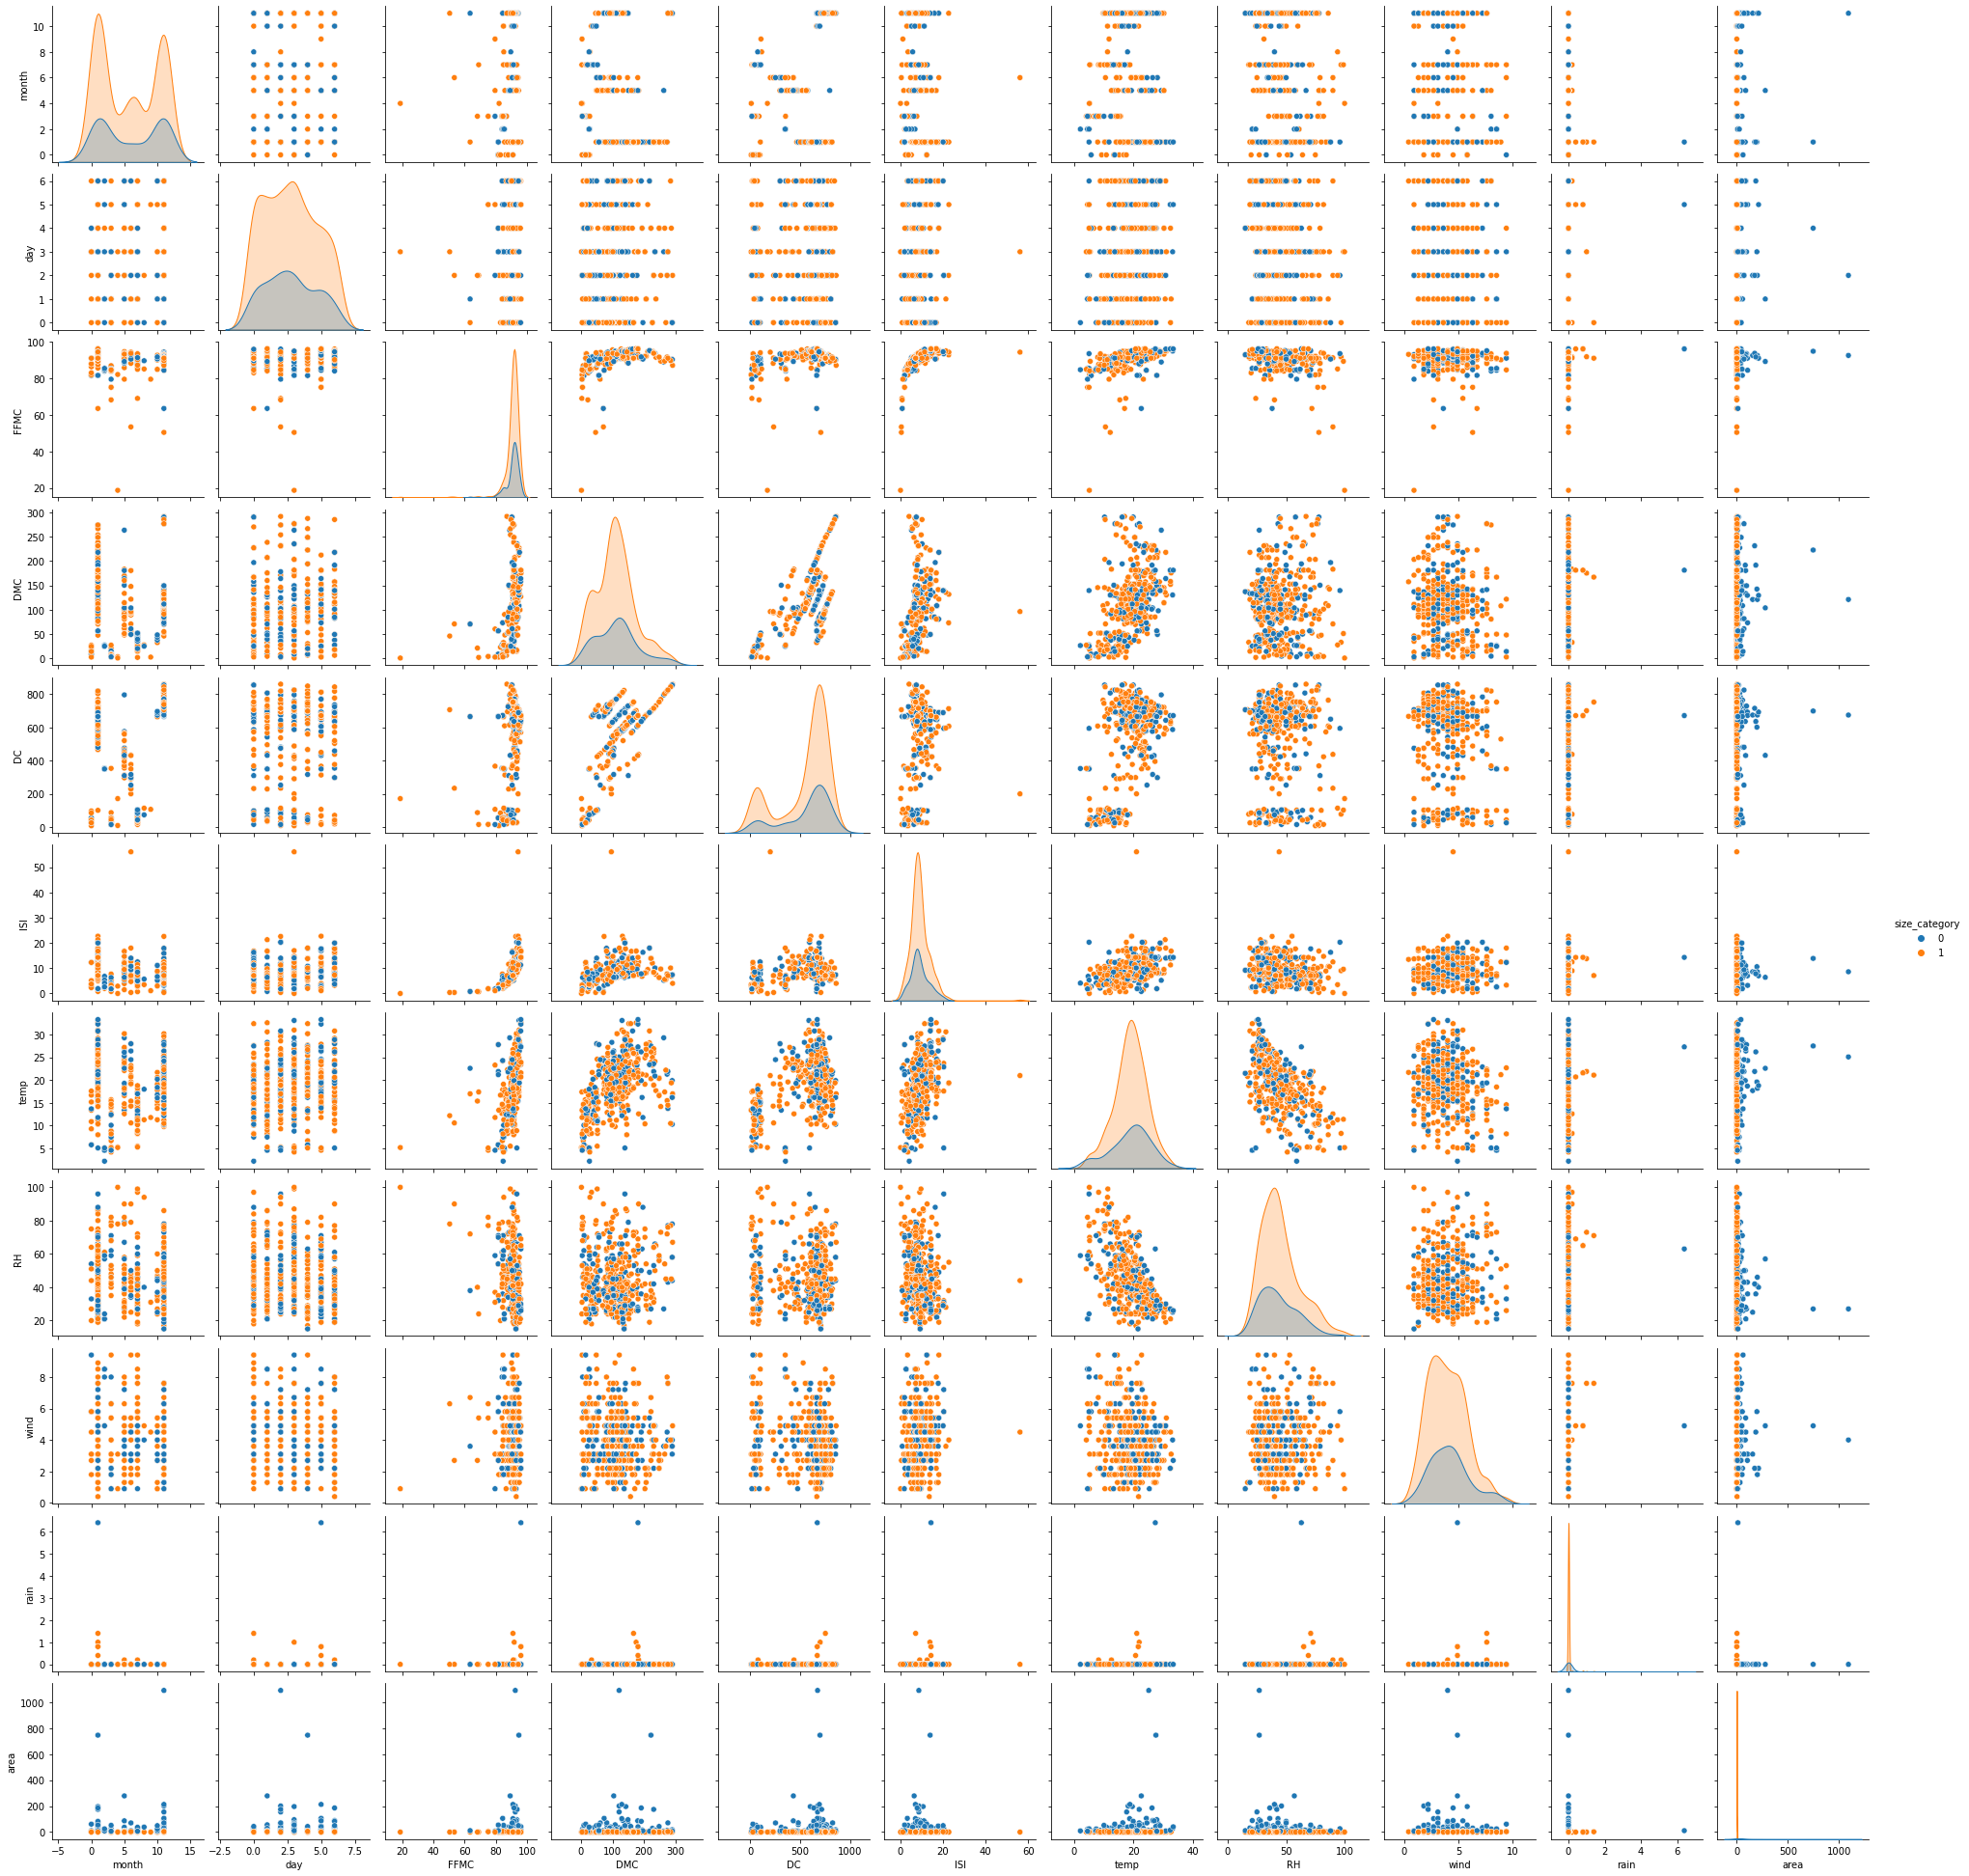

In [11]:
sns.pairplot(forest, hue='size_category')

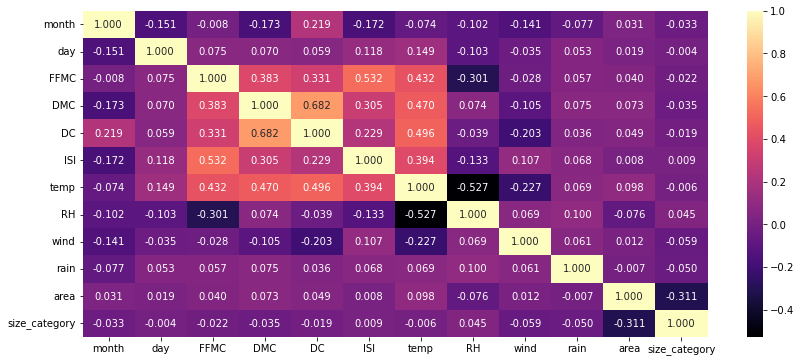

In [12]:
plt.figure(figsize = (14, 6));
sns.heatmap(forest.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

## Neural Network

In [13]:
np.random.seed(7)

# split into input (X) and output (Y) variables
X = forest.iloc[:,0:11]
Y = forest.iloc[:,-1]

In [14]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

### 1. Batch Size and Epochs

In [15]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=11,  activation='relu')) #1st layer
model.add(Dense(11,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [16]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 21ms/step - loss: 5.8090 - accuracy: 0.6185 - val_loss: 7.8148 - val_accuracy: 0.4503
Epoch 2/250
35/35 [==============================] - 0s 8ms/step - loss: 3.4670 - accuracy: 0.6387 - val_loss: 7.6280 - val_accuracy: 0.4678
Epoch 3/250
35/35 [==============================] - 0s 8ms/step - loss: 2.9639 - accuracy: 0.6272 - val_loss: 5.9698 - val_accuracy: 0.4854
Epoch 4/250
35/35 [==============================] - 0s 8ms/step - loss: 2.3138 - accuracy: 0.6590 - val_loss: 6.1397 - val_accuracy: 0.4737
Epoch 5/250
35/35 [==============================] - 0s 8ms/step - loss: 1.9077 - accuracy: 0.6676 - val_loss: 5.0648 - val_accuracy: 0.4854
Epoch 6/250
35/35 [==============================] - 0s 9ms/step - loss: 1.2089 - accuracy: 0.7110 - val_loss: 2.1447 - val_accuracy: 0.5906
Epoch 7/250
35/35 [==============================] - 0s 8ms/step - loss: 0.6605 - accuracy: 0.7832 - val_loss: 1.2547 - val_accuracy: 0.5906
Epoch 8/250


In [18]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 5ms/step - loss: 0.1574 - accuracy: 0.9691
accuracy: 96.91%


In [19]:
model.metrics_names

['loss', 'accuracy']

In [20]:
scores

[0.15741081535816193, 0.9690521955490112]

In [21]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

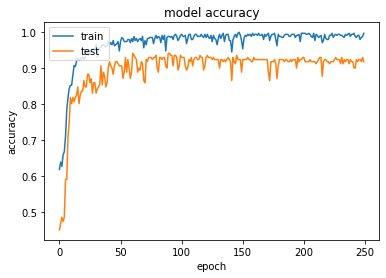

In [22]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

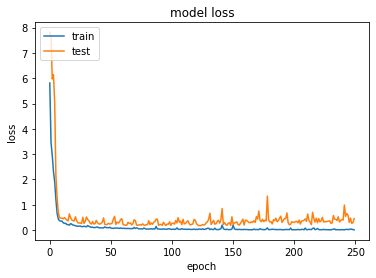

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Neural Network Hyper Parameter :

In [25]:
# Standardization

a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [26]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-4.874674e-17,5.110891e-17,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959e+00,-1.423121e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-1.089076e+00,-9.031536e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,5.533922e-02,1.367805e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,1.199754e+00,6.567476e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.199754e+00,1.696682e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


##### Create model using function:

In [61]:
def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=11, init='uniform', activation='relu'))
    model.add(Dense(11, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

##### Create the model:

In [62]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_5052\2900182372.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


#### Tuning of Hyperparameters using different techniques
    1. Batch Size and Epochs
    2. Learning rate and Drop out rate
    3. Activation Function and Kernel Initializer
    4. Number of Neurons in Activation layer
    5. Training model with optimum values of Hyperparameters    

### 2. Learning rate and Drop out rate

In [70]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate, dropout_rate):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(14,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = learning_rate)

    model.compile(loss = 'binary_crossentropy',
                  optimizer = adam,
                  metrics = ['accuracy'])
    
    return model


In [71]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_5052\2440241266.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


In [72]:
# Define the grid search parameters

learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,
                   dropout_rate = dropout_rate)


In [73]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   3.7s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.846 total time=   3.8s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.864 total time=   3.6s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.874 total time=   3.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.854 total time=   4.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [74]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9767176985740662, using {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8876773715019226,0.0569208790139583 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9573188900947571,0.03048376321210915 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9574309110641479,0.031505077704212354 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8625093340873718,0.07142343580717715 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9592233061790466,0.04271844462914988 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9651605606079101,0.024914116478636193 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.8587005257606506,0.07704899024811417 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9767176985740662,0.020925426829504986 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9496265888214112,0.03599058669814157 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Inference: The best score is 97.67 % , using 'dropout_rate': 0.2 as 'learning_rate': 0.01

#### 3. Activation Function and Kernel Initializer

In [75]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [76]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_5052\2440241266.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


In [77]:
# Define the grid search parameters
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,
                   init = init)


In [78]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   4.3s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   3.9s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   3.8s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   4.1s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   5.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [79]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9225167989730835, using {'activation_function': 'tanh', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8663928270339966,0.06843730428120821 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8548356890678406,0.07926024658433552 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.9225167989730835,0.03922685759335304 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9166915535926818,0.042305635461112705 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9050970792770385,0.04796008730794122 with: {'activat

Inference: The best score is 92.25 % , using 'activation_function': 'tanh' as 'init': 'uniform'

### 4. Number of Neurons in activation layer

In [84]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',
                  optimizer = adam,
                  metrics = ['accuracy'])
    return model


In [85]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_5052\2440241266.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


In [86]:
# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,
                   neuron2 = neuron2)


In [87]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   5.3s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   5.0s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.660 total time=   4.2s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.748 total time=   4.3s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.816 total time=   4.2s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [88]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9089245557785034, using {'neuron1': 16, 'neuron2': 8}
0.7946601986885071,0.11392367455063974 with: {'neuron1': 4, 'neuron2': 2}
0.8082524180412293,0.1029080448277969 with: {'neuron1': 4, 'neuron2': 4}
0.8354182124137879,0.08510528311020736 with: {'neuron1': 4, 'neuron2': 8}
0.8179611563682556,0.0958415226639823 with: {'neuron1': 8, 'neuron2': 2}
0.8470873713493348,0.08235276498398149 with: {'neuron1': 8, 'neuron2': 4}
0.8703136801719665,0.0699564619754985 with: {'neuron1': 8, 'neuron2': 8}
0.8548170328140259,0.07716935033147332 with: {'neuron1': 16, 'neuron2': 2}
0.8819641590118408,0.06791809829938658 with: {'neuron1': 16, 'neuron2': 4}
0.9089245557785034,0.04698307920732727 with: {'neuron1': 16, 'neuron2': 8}


Inference: The best score is 90.89 % , using 'neuron1': 16 and 'neuron2': 8

# Hyperparameters all at once


The hyperparameter optimization was carried out by taking 2 hyperparameters at once. We may have missed the best values. The performance can be further improved by finding the optimum values of hyperparameters all at once given by the code snippet below.
#### This process is computationally expensive.